In [1]:
from pylab import *
from numpy import *
from PIL import Image
from PCV.localdescriptors import harris

harris threshold = 0.1


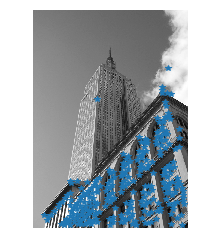

harris threshold = 0.05


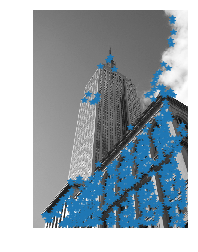

harris threshold = 0.01


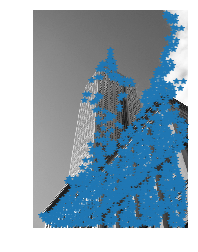

In [2]:
"""
Detecting Harris corner points
"""
# open image
im = array(Image.open('resources/empire.jpg').convert('L'))

# detect corners and plot
harrisim = harris.compute_harris_response(im)
# with default threshold 0.1
filtered_coords = harris.get_harris_points(harrisim, 10, threshold=0.1)
print("harris threshold = 0.1")
harris.plot_harris_points(im, filtered_coords)

# with default threshold 0.05
filtered_coords = harris.get_harris_points(harrisim, 10, threshold=0.05)
print("harris threshold = 0.05")
harris.plot_harris_points(im, filtered_coords)

# with default threshold 0.01
filtered_coords = harris.get_harris_points(harrisim, 10, threshold=0.01)
print("harris threshold = 0.01")
harris.plot_harris_points(im, filtered_coords)

In [3]:
from PCV.tools.imtools import imresize
"""
Harris point matching
"""
im1 = array(Image.open("./resources/crans_1_small.jpg").convert("L"))
im2 = array(Image.open("./resources/crans_2_small.jpg").convert("L"))

# resize to make matching faster
im1 = imresize(im1,(int(im1.shape[1]/2),int(im1.shape[0]/2)))
im2 = imresize(im2,(int(im2.shape[1]/2),int(im2.shape[0]/2)))

starting matching


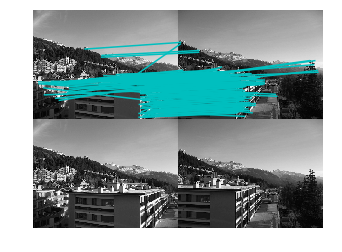

In [4]:
wid = 5
harrisim = harris.compute_harris_response(im1,5) 
filtered_coords1 = harris.get_harris_points(harrisim,wid+1) 
d1 = harris.get_descriptors(im1,filtered_coords1,wid)

harrisim = harris.compute_harris_response(im2,5) 
filtered_coords2 = harris.get_harris_points(harrisim,wid+1) 
d2 = harris.get_descriptors(im2,filtered_coords2,wid)

print('starting matching')
matches = harris.match_twosided(d1,d2)

figure()
gray() 
harris.plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches) 
show()